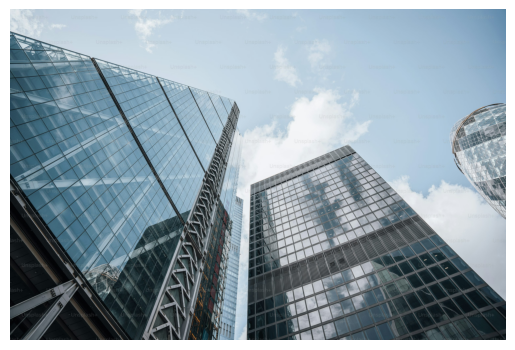

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
from skimage import exposure
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk

# drive.mount('/content/drive')

image_path = 'building.jpg'
image = cv2.imread(image_path)

# Преобразование изображения из BGR (формат OpenCV) в RGB (формат для matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения с помощью matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


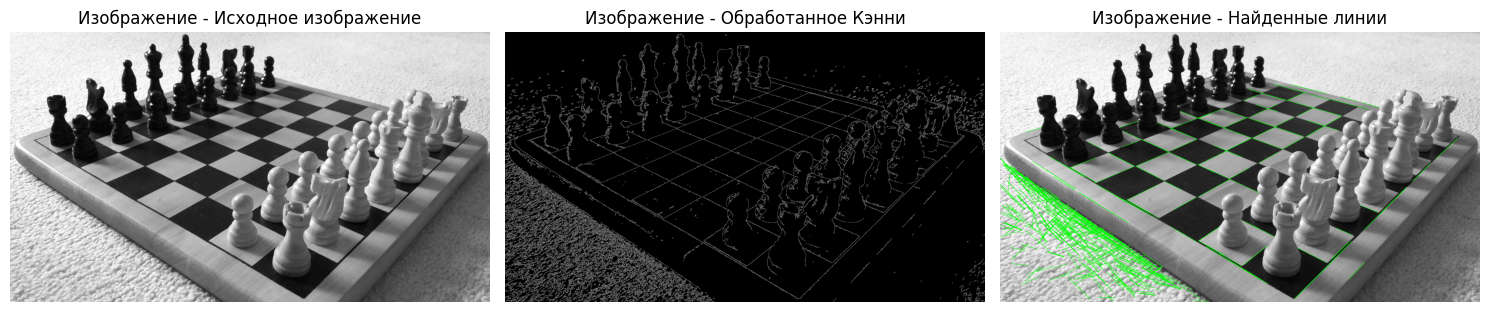

In [10]:
def detect_and_draw_precise_lines(img, img_name):
    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Deteksi garis menggunakan probabilistik Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

    # Salinan gambar asli untuk menggambar garis hijau
    img_with_lines = img.copy()

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Gambarkan setiap garis yang ditemukan (warna hijau)
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Plot hasil
    plt.figure(figsize=(15, 5))

    # Gambar asli
    plt.subplot(1, 3, 1)
    plt.title(f"{img_name} - Исходное изображение")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Gambar hasil Canny
    plt.subplot(1, 3, 2)
    plt.title(f"{img_name} - Обработанное Кэнни")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    # Gambar dengan garis hijau
    plt.subplot(1, 3, 3)
    plt.title(f"{img_name} - Найденные линии")
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load gambar
image_path = 'chess.jpg'   # Assuming this is the correct path

# image_path = "path_to_your_image.jpg"  # Ganti dengan path gambar Anda
img = cv2.imread(image_path)

# Jalankan deteksi dan visualisasi
detect_and_draw_precise_lines(img, "Изображение")


In [ ]:
def detect_and_draw_refined_lines(img, img_name):
    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

    # Deteksi garis menggunakan probabilistik Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

    # Salinan gambar asli untuk menggambar garis hijau
    img_with_lines = img.copy()

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Filter hanya garis horizontal atau vertikal (opsional)
            angle = abs(np.arctan2(y2 - y1, x2 - x1))  # Hitung sudut
            if 0 <= angle <= np.pi / 8 or np.pi - np.pi / 8 <= angle <= np.pi:
                # Gambarkan garis dengan warna hijau (anti-aliasing opsional)
                cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2, cv2.LINE_AA)

    # Plot hasil
    plt.figure(figsize=(15, 5))

    # Gambar asli
    plt.subplot(1, 3, 1)
    plt.title(f"{img_name} - Исходное изображение")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Gambar hasil Canny
    plt.subplot(1, 3, 2)
    plt.title(f"{img_name} - Обработанное Кэнни")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    # Gambar dengan garis hijau
    plt.subplot(1, 3, 3)
    plt.title(f"{img_name} - Найденные линии")
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Load gambar
image_path = '/content/drive/My Drive/building.jpg'   # Assuming this is the correct path

# image_path = "path_to_your_image.jpg"  # Ganti dengan path gambar Anda
img = cv2.imread(image_path)

# Jalankan deteksi dan visualisasi
detect_and_draw_refined_lines(img, "Изображение")


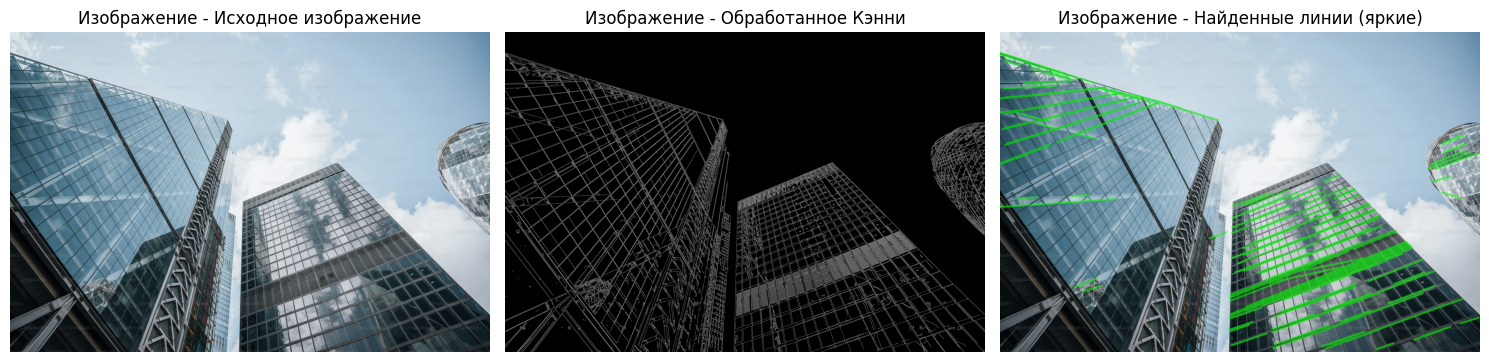

In [ ]:
def detect_and_draw_highlighted_lines(img, img_name):
    # Konversi ke grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

    # Deteksi garis menggunakan probabilistik Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

    # Salinan gambar asli untuk menggambar garis hijau
    img_with_lines = img.copy()

    if lines is not None:
        overlay = img.copy()  # Overlay untuk menambahkan efek transparan
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Filter hanya garis horizontal atau vertikal (opsional)
            angle = abs(np.arctan2(y2 - y1, x2 - x1))  # Hitung sudut
            if 0 <= angle <= np.pi / 8 or np.pi - np.pi / 8 <= angle <= np.pi:
                # Gambarkan garis tebal dengan warna hijau
                cv2.line(overlay, (x1, y1), (x2, y2), (0, 255, 0), 10, cv2.LINE_AA)

        # Gabungkan overlay dengan gambar asli (alpha blending)
        alpha = 0.6  # Transparansi
        img_with_lines = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)

    # Plot hasil
    plt.figure(figsize=(15, 5))

    # Gambar asli
    plt.subplot(1, 3, 1)
    plt.title(f"{img_name} - Исходное изображение")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Gambar hasil Canny
    plt.subplot(1, 3, 2)
    plt.title(f"{img_name} - Обработанное Кэнни")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    # Gambar dengan garis hijau terang
    plt.subplot(1, 3, 3)
    plt.title(f"{img_name} - Найденные линии (яркие)")
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Load gambar
image_path = '/content/drive/My Drive/building.jpg'   # Assuming this is the correct path
# image_path = "path_to_your_image.jpg"  # Ganti dengan path gambar Anda
img = cv2.imread(image_path)

# Jalankan deteksi dan visualisasi
detect_and_draw_highlighted_lines(img, "Изображение")


## Zadanie 2

In [12]:
# image_path = '/content/drive/My Drive/building.jpg'   # Assuming this is the correct path

images = [cv2.imread(f'circle{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1,4)]

In [22]:
# image_path = '/content/drive/My Drive/building.jpg'   # Assuming this is the correct path

images = [cv2.imread(f'circle{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1,4)]

# функция для поиска и отображения окружностей
def detect_and_draw_circles(img, img_name):
  # исходное изображение
  original_img = img.copy()
  # применение преобразования Кэнии
  edges = cv2.Canny(img, 255, 255, apertureSize=3)

  # поиск окружностей определенного радиуса
  circles_fixed_radius = cv2.HoughCircles(
      edges,
      cv2.HOUGH_GRADIENT,
      dp=1,  # параметр разрешения для метода Хафа
      minDist=25,  # минимальное расстояние между центрами найденных окружностей
      param1=30,
      param2= 50,
      minRadius=85,
      maxRadius=85
  )

  circles_range_radius = cv2.HoughCircles(
      edges,
      cv2.HOUGH_GRADIENT,
      dp=1,  #
      minDist=50,  #
      param1=30,
      param2= 70,
      minRadius=0,
      maxRadius=200
  )

  img_with_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  if circles_fixed_radius is not None:
    circles_fixed_radius = np.uint16(np.around(circles_fixed_radius))
    for circle in circles_fixed_radius[0, :]:
      center = (circle[0], circle[1])
      radius = circle[2]
      # отображение окружности и центра
      cv2.circle(img_with_circles, center, radius, (255,0 , 0), 3)  # красный цвет фиксированных радиусов
      cv2.circle(img_with_circles, center, 2, (0, 255, 0), -1)  # центр окружности

  if circles_range_radius is not None:
    circles_range_radius = np.uint16(np.around(circles_range_radius))
    for i in circles_range_radius[0, :]:
      center = (i[0], i[1])
      radius = i[2]
      # отображение окружности и центра
      cv2.circle(img_with_circles, center, radius, (0,0, 255), 3)  # Синий цвет для окружностей из диапазона
      cv2.circle(img_with_circles, center, 5, (0, 255, 0), -1) # центр окружности

  show_images= (
      [f'{img_name} - исходное изображение', f'{img_name} - обработанное Кэнни', f'{img_name} - Найденные окружности'],
      [original_img, edges, img_with_circles]
  )

In [23]:
for i, img in enumerate(images, start=1):
  detect_and_draw_circles(img, f'Изображение {i}')

Image 1: Lines Detected: 1801, Shortest Line: 50.00, Longest Line: 835.40


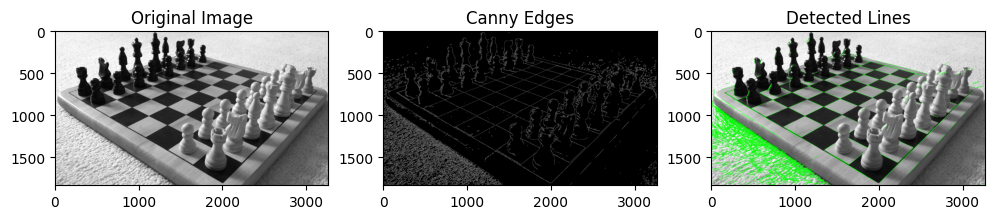

Image 2: Lines Detected: 4679, Shortest Line: 50.00, Longest Line: 1201.46


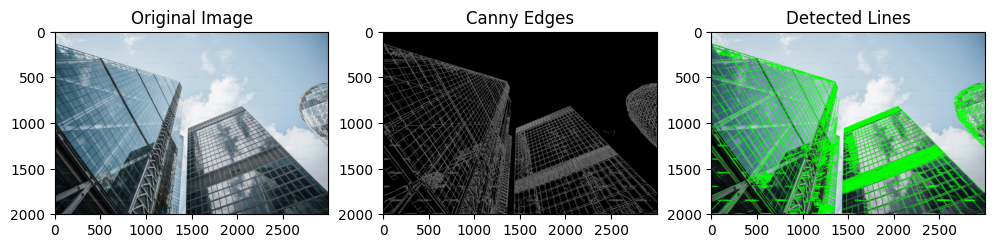

Image 1: Circles Detected: 332


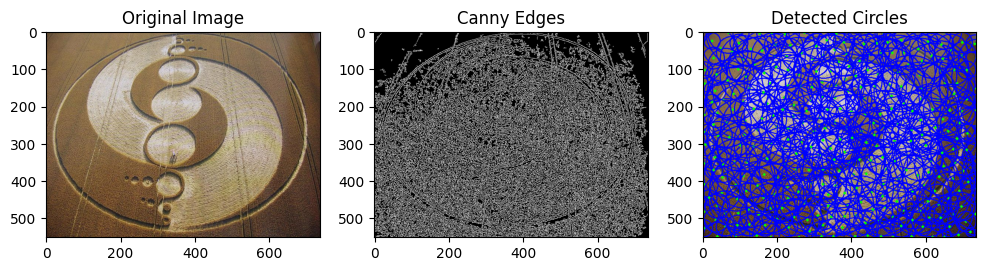

Image 2: Circles Detected: 161


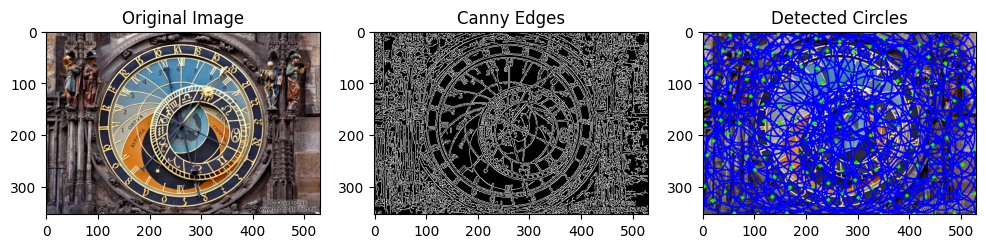

Image 3: Circles Detected: 30


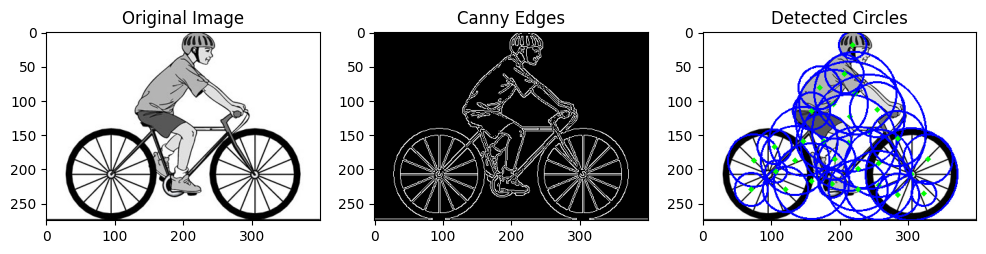

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to detect lines using Hough Transform
def detect_lines(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Overlay the detected lines on the original image
    img_with_lines = img.copy()
    lengths = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            lengths.append(length)

    # Calculate statistics for lines
    shortest_line = min(lengths) if lengths else 0
    longest_line = max(lengths) if lengths else 0
    line_count = len(lines) if lines is not None else 0

    return img, edges, img_with_lines, line_count, shortest_line, longest_line


# Function to detect circles using Hough Transform
# функция для поиска и отображения окружностей
def detect_and_draw_circles(img, img_name):
  # исходное изображение
  original_img = img.copy()
  # применение преобразования Кэнии
  edges = cv2.Canny(img, 255, 255, apertureSize=3)

  # поиск окружностей определенного радиуса
  circles_fixed_radius = cv2.HoughCircles(
      edges,
      cv2.HOUGH_GRADIENT,
      dp=1,  # параметр разрешения для метода Хафа
      minDist=25,  # минимальное расстояние между центрами найденных окружностей
      param1=30,
      param2= 50,
      minRadius=85,
      maxRadius=85
  )

  circles_range_radius = cv2.HoughCircles(
      edges,
      cv2.HOUGH_GRADIENT,
      dp=1,  #
      minDist=50,  #
      param1=30,
      param2= 70,
      minRadius=0,
      maxRadius=200
  )

  img_with_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  if circles_fixed_radius is not None:
    circles_fixed_radius = np.uint16(np.around(circles_fixed_radius))
    for circle in circles_fixed_radius[0, :]:
      center = (circle[0], circle[1])
      radius = circle[2]
      # отображение окружности и центра
      cv2.circle(img_with_circles, center, radius, (255,0 , 0), 3)  # красный цвет фиксированных радиусов
      cv2.circle(img_with_circles, center, 2, (0, 255, 0), -1)  # центр окружности

  if circles_range_radius is not None:
    circles_range_radius = np.uint16(np.around(circles_range_radius))
    for i in circles_range_radius[0, :]:
      center = (i[0], i[1])
      radius = i[2]
      # отображение окружности и центра
      cv2.circle(img_with_circles, center, radius, (0,0, 255), 3)  # Синий цвет для окружностей из диапазона
      cv2.circle(img_with_circles, center, 5, (0, 255, 0), -1) # центр окружности

#   show_images= (
#       [f'{img_name} - исходное изображение', f'{img_name} - обработанное Кэнни', f'{img_name} - Найденные окружности'],
#       [original_img, edges, img_with_circles]
#   )

    return img, edges, img_with_circles, circle_count


# Paths to your images
line_image_paths = ["chess.jpg", "building.jpg",]  # Replace with your file paths
circle_image_paths = ["circle1.jpg", "circle2.jpg", "circle3.jpg"]  # Replace with your file paths

# Process line images
for idx, img_path in enumerate(line_image_paths):
    img, edges, img_with_lines, line_count, shortest_line, longest_line = detect_lines(img_path)
    print(f"Image {idx + 1}: Lines Detected: {line_count}, Shortest Line: {shortest_line:.2f}, Longest Line: {longest_line:.2f}")

    # Plot results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2)
    plt.title("Canny Edges")
    plt.imshow(edges, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.show()

# Process circle images
for idx, img_path in enumerate(circle_image_paths):
    img, edges, img_with_circles, circle_count = detect_circles(img_path)
    print(f"Image {idx + 1}: Circles Detected: {circle_count}")

    # Plot results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2)
    plt.title("Canny Edges")
    plt.imshow(edges, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Detected Circles")
    plt.imshow(cv2.cvtColor(img_with_circles, cv2.COLOR_BGR2RGB))
    plt.show()


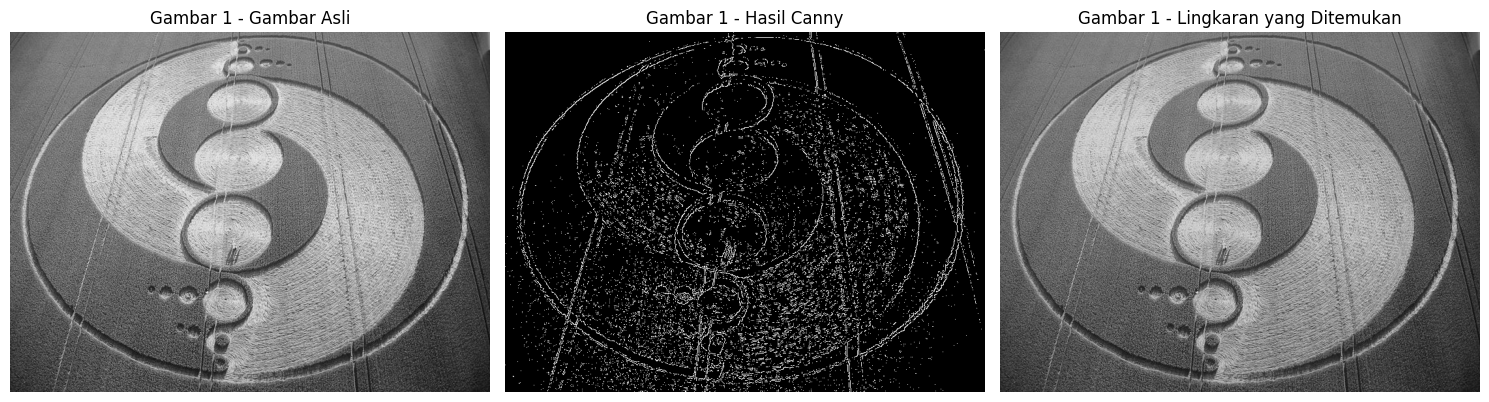

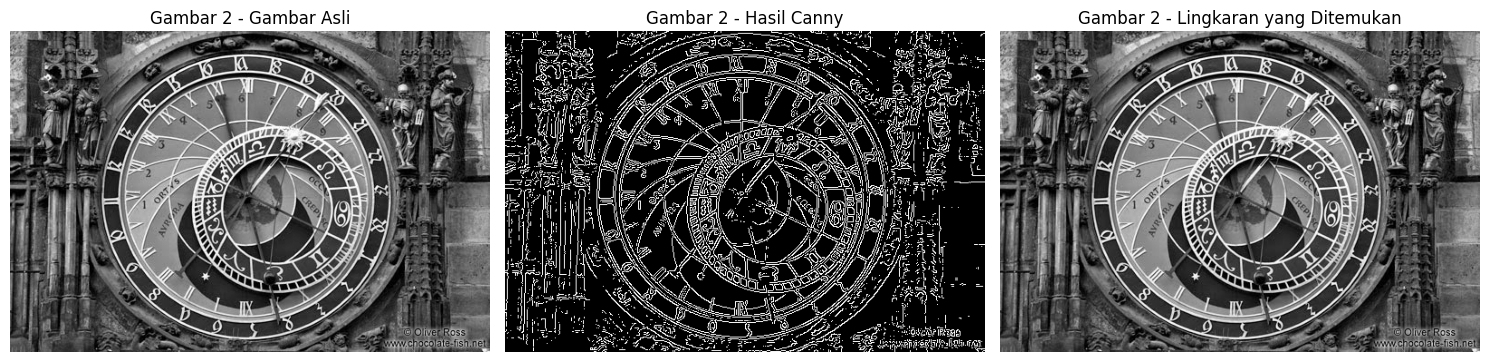

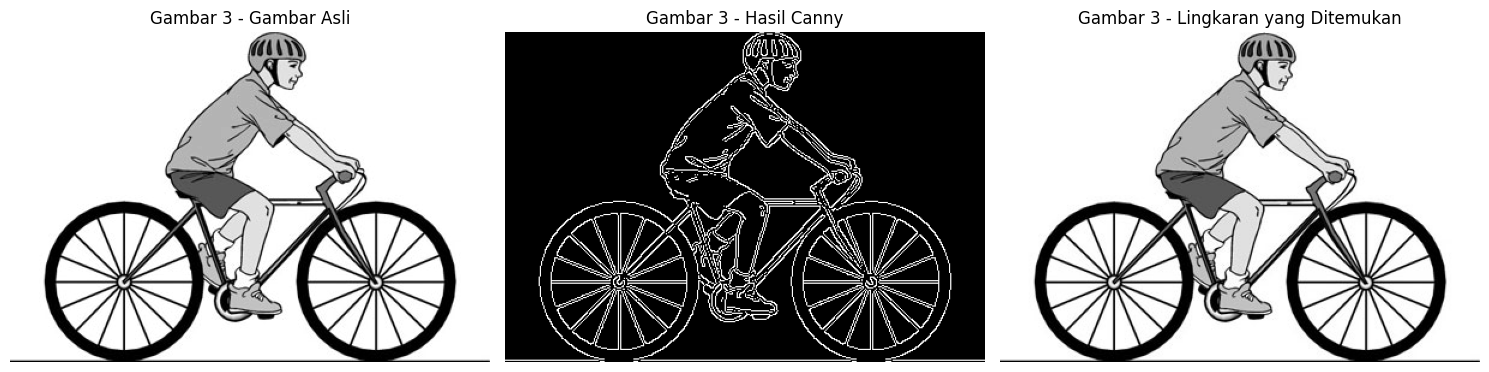

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dari file
images = [cv2.imread(f'circle{i}.jpg', cv2.IMREAD_GRAYSCALE) for i in range(1, 4)]

# Fungsi untuk menampilkan gambar menggunakan matplotlib
def show_images(titles, images):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk mendeteksi dan menggambar lingkaran
def detect_and_draw_circles(img, img_name):
    # Salinan gambar asli
    original_img = img.copy()
    # Penerapan edge detection menggunakan Canny
    edges = cv2.Canny(img, 255, 255, apertureSize=3)

    # Mencari lingkaran dengan radius tertentu
    circles_fixed_radius = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,  # Parameter resolusi untuk metode Hough
        minDist=25,  # Jarak minimum antara pusat lingkaran
        param1=30,
        param2=50,
        minRadius=85,
        maxRadius=85
    )

    # Mencari lingkaran dengan radius dalam rentang tertentu
    circles_range_radius = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=30,
        param2=70,
        minRadius=0,
        maxRadius=200
    )

    img_with_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if circles_fixed_radius is not None:
        circles_fixed_radius = np.uint16(np.around(circles_fixed_radius))
        for circle in circles_fixed_radius[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            # Gambar lingkaran dan pusatnya
            cv2.circle(img_with_circles, center, radius, (255, 0, 0), 3)  # Warna merah
            cv2.circle(img_with_circles, center, 2, (0, 255, 0), -1)  # Pusat lingkaran

    if circles_range_radius is not None:
        circles_range_radius = np.uint16(np.around(circles_range_radius))
        for circle in circles_range_radius[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            # Gambar lingkaran dan pusatnya
            cv2.circle(img_with_circles, center, radius, (0, 0, 255), 3)  # Warna biru
            cv2.circle(img_with_circles, center, 5, (0, 255, 0), -1)  # Pusat lingkaran

    # Tampilkan gambar menggunakan matplotlib
    show_images(
        [f'{img_name} - Gambar Asli', f'{img_name} - Hasil Canny', f'{img_name} - Lingkaran yang Ditemukan'],
        [original_img, edges, img_with_circles]
    )

# Jalankan fungsi untuk setiap gambar
for i, img in enumerate(images, start=1):
    detect_and_draw_circles(img, f'Gambar {i}')
